In [ ]:
import cv2
import numpy as np

image_base_name = 'safeway-0'
suffix = 'webp'

# Load image from 'images' folder
image = cv2.imread(f'images/{image_base_name}.{suffix}')  # Replace with your image filename
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load depth mask and focallength from npz file
data = np.load(f'images/{image_base_name}_depth_and_focal.npz')
depth = data['depth']
focallength_px = data['focallength_px']

# Check if files are loaded
if image_rgb is None:
    raise FileNotFoundError("Image not found in 'images' folder.")
if depth is None:
    raise FileNotFoundError("Depth mask not found in npz file.")
if focallength_px is None:
    raise FileNotFoundError("Focallength not found in npz file.")

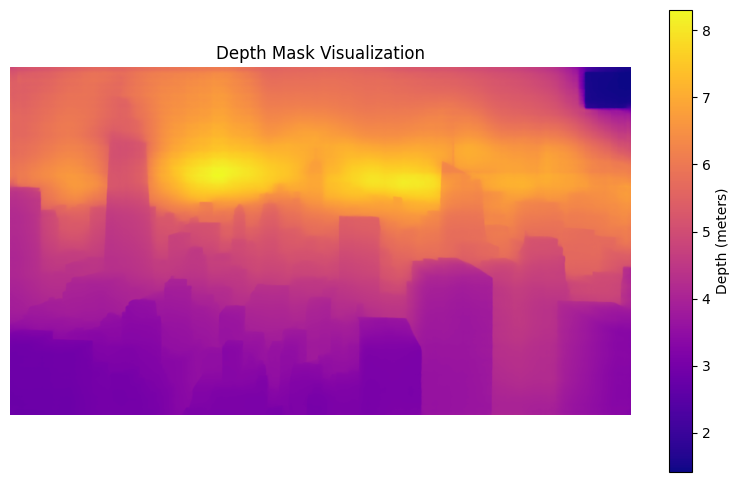

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(depth, cmap='plasma')
plt.title('Depth Mask Visualization')
plt.colorbar(label='Depth (meters)')
plt.axis('off')
plt.show()

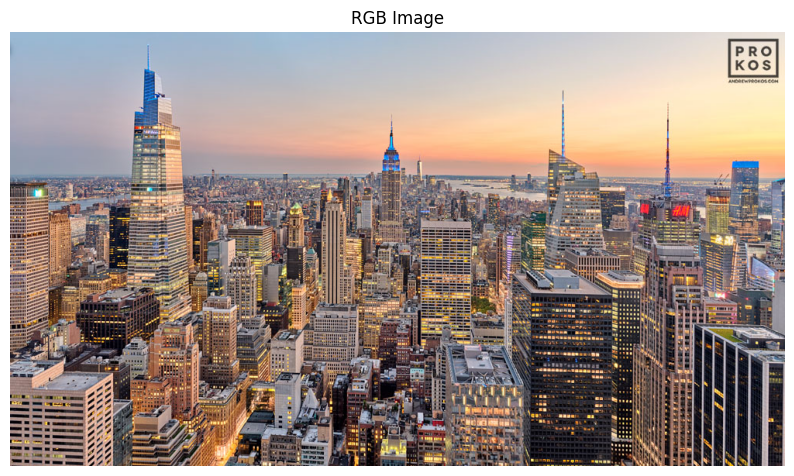

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.show()

In [15]:
# Project the image into 3D (x, y, z) using the depth map and camera intrinsics

h, w = depth.shape

# Assume principal point is at the image center
cx = w / 2
cy = h / 2

# If fx and fy are already defined, use them; otherwise, use focallength_px
fx_val = fx if 'fx' in locals() else focallength_px
fy_val = fy if 'fy' in locals() else focallength_px

# Create meshgrid of pixel coordinates
xx, yy = np.meshgrid(np.arange(w), np.arange(h))

# Compute 3D coordinates
z = depth
x = (xx - cx) * z / fx_val
y = (yy - cy) * z / fy_val

# Stack into (N, 3) array
points_3d = np.stack([x, y, z], axis=-1).reshape(-1, 3)

In [16]:
import open3d as o3d

# Reshape image and depth to match point cloud shape
rgb = image_rgb.reshape(-1, 3) / 255.0  # Normalize to [0, 1]

# Create Open3D point cloud
pcd_img = o3d.geometry.PointCloud()
pcd_img.points = o3d.utility.Vector3dVector(points_3d)
pcd_img.colors = o3d.utility.Vector3dVector(rgb)

# Visualize
o3d.visualization.draw_geometries([pcd_img])